In [1]:
#!pip install -e git+https://github.com/jakeret/tf_unet.git#egg=tf_unet
# Requirements:
#!pip install tensorflow==1.3
#!pip install numpy==1.16 
#!pip install pillow 8.3.2

In [ ]:
from __future__ import division, print_function
import glob
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import f1_score, classification_report, roc_curve, auc
import tensorflow as tf
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(98765)

In [2]:
from tf_unet import image_util
from tf_unet import unet
from tf_unet import util

In [ ]:
# C:\Users\16153\Desktop\Books\ML10

### Train and save model

In [3]:
# Add paths
prediction_path = "C:/Users/16153/Desktop/Books/ML10/prediction_ML_Class"
output_path = "C:/Users/16153/Desktop/Books/ML10/trained_ML_Class"
training_data = image_util.ImageDataProvider("C:/Users/16153/Desktop/Books/ML10/data_trainset/*.tif")

Number of files used: 26
Number of channels: 1
Number of classes: 2


In [4]:
# add number of training images.
i=26 
x_train, y_train = training_data(i)
print(x_train.shape)

(26, 1000, 1000, 1)


In [5]:
# Add epochs and batch size
# Add learning rate, choose optimizers ( Adam,momentum )

epochs = 50
training_iters=32

net = unet.Unet(layers=3, features_root=32, channels=1, n_class=2)
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2,learning_rate=1.4,decay_rate=0.95))

path = trainer.train(training_data, output_path, training_iters=training_iters, epochs=epochs, 
                     display_step=1, prediction_path=prediction_path)

2021-12-02 16:31:06,336 Layers 3, features 32, filter size 3x3, pool size: 2x2


Instructions for updating:
Colocations handled automatically by placer.


2021-12-02 16:31:06,360 From C:\Users\16153\anaconda3\envs\project1\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2021-12-02 16:31:06,400 From c:\users\16153\project - fracture\src\tf-unet\tf_unet\layers.py:39: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2021-12-02 16:31:08,755 Removing 'C:\Users\16153\Desktop\Books\ML10\prediction_ML_Class'
2021-12-02 16:31:08,755 Removing 'C:\Users\16153\Desktop\Books\ML10\trained_ML_Class'
2021-12-02 16:31:08,760 Allocating 'C:\Users\16153\Desktop\Books\ML10\prediction_ML_Class'
2021-12-02 16:31:08,765 Allocating 'C:\Users\16153\Desktop\Books\ML10\trained_ML_Class'
2021-12-02 16:31:45,571 Verification error= 0.6%, loss= 0.6638
2021-12-02 16:31:49,131 Start optimization
2021-12-02 16:32:17,660 Iter 0, Minibatch Loss= 0.2346, Training Accuracy= 0.9566, Minibatch error= 4.3%
2021-12-02 16:32:43,920 Iter 1, Minibatch Loss= 0.0000, Training Accuracy= 1.0000, Minibatch error= 0

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


2021-12-03 09:39:01,066 From C:\Users\16153\anaconda3\envs\project1\lib\site-packages\tensorflow\python\summary\summary_iterator.py:68: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


loss in the final epoch is 0.019780763002415824


(0.0, 1.0)

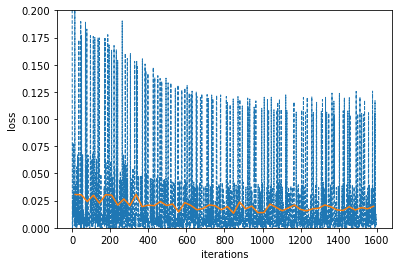

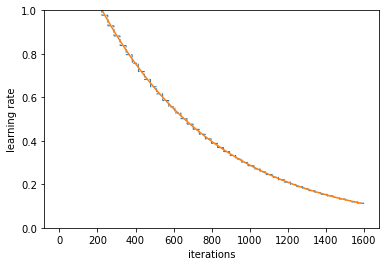

In [6]:
# Calculate loss per iteration 

loss,loss_,lr,lr_=[],[],[],[]

eventfile = glob.glob(output_path+'/*events*')[0]

for event in tf.train.summary_iterator(eventfile):
    for v in event.summary.value:
        if v.tag == 'loss':
            loss.append(v.simple_value)
        if v.tag == 'learning_rate':
            lr.append(v.simple_value)

iter = np.arange(0, len(loss))
iter_=[]
epoch = np.arange(0, epochs)

for i in np.arange(0,len(loss),int(len(loss)/epochs)):
    loss_.append(np.mean(loss[i:i+int(len(loss)/epochs)]))
    lr_.append(np.mean(lr[i:i+int(len(lr)/epochs)]))
    iter_.append(np.mean(iter[i:i+int(len(iter)/epochs)]))

plt.figure()
plt.plot(iter, loss, lw=1, linestyle = '--')
plt.plot(iter_, loss_)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim([0,0.2])
print('loss in the final epoch is '+ str(loss_[len(epoch)-1]))
plt.figure()
plt.plot(iter, lr, lw=1, linestyle = '--')
plt.plot(iter_, lr_)
plt.xlabel('iterations')
plt.ylabel('learning rate')
plt.ylim([0,1])



### Validation set performance

In [7]:
# Add validation data path
# Add number of validation images, 

valid_data = image_util.ImageDataProvider("C:/Users/16153/Desktop/Books/ML10/data_validset/*.tif")
i=6 
x_valid, y_valid = valid_data(i)

net = unet.Unet(layers=3, features_root=32, channels=1, n_class=2)
prediction = net.predict(output_path+"/model.ckpt", x_valid)

print('input shape:',x_valid.shape)
print('label shape:',y_valid.shape)
print('prediction shape:',prediction.shape)

Number of files used: 6
Number of channels: 1
Number of classes: 2


2021-12-03 09:39:12,361 Layers 3, features 32, filter size 3x3, pool size: 2x2


Instructions for updating:
Use standard file APIs to check for files with this prefix.


2021-12-03 09:39:13,119 From C:\Users\16153\anaconda3\envs\project1\lib\site-packages\tensorflow\python\training\saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt


2021-12-03 09:39:13,124 Restoring parameters from C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt
2021-12-03 09:39:13,207 Model restored from file: C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt


input shape: (6, 1000, 1000, 1)
label shape: (6, 1000, 1000, 2)
prediction shape: (6, 960, 960, 2)


prediction maximum value: 0.49445602
prediction minimum value: 4.037442e-06
label maximum value: 1.0
label minimum value: 0.0
label shape: (5529600,)
prediction shape: (5529600,)


Text(0, 0.5, 'f1-score')

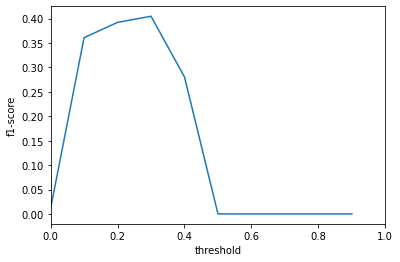

In [8]:
# F1 score vs threshold

valid_y = y_valid[...,20:980,20:980,1].flatten()
valid_y_predict = prediction[...,1].flatten()

print('prediction maximum value:',max(valid_y_predict))
print('prediction minimum value:',min(valid_y_predict))
print('label maximum value:',max(valid_y))
print('label minimum value:',min(valid_y))
print('label shape:', valid_y.shape)
print('prediction shape:',valid_y_predict.shape)

f1 = []
thr = np.arange(0,1,0.1)
for i in thr:
    f1.append(f1_score(valid_y, (valid_y_predict > i)))
    
plt.figure()
plt.plot(thr, f1)
plt.xlim([0,1])
plt.xlabel('threshold')
plt.ylabel('f1-score')

From the above graph, choose threshold = 0.2 

In [24]:
# Calculate IOU metrics
from sklearn.metrics import jaccard_score
jaccard_score(valid_y,(valid_y_predict > 0.2 ))

0.24407664308770002

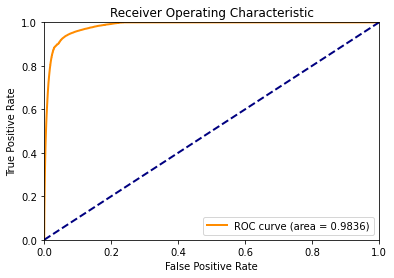

AUC =  0.9835673911447738


In [11]:
#AUC and ROC curve 

fpr, tpr, thresholds = roc_curve(valid_y, valid_y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()
print('AUC = ',roc_auc)

### Testing set performance

In [28]:
#Add the testing path set
# Number of images

test_data = image_util.ImageDataProvider("C:/Users/16153/Desktop/Books/ML10/data_testset/*.tif")
i=6 #
x_test, y_test = test_data(i)

prediction = net.predict(output_path+"/model.ckpt", x_test)

print('input shape:',x_test.shape)
print('label shape:',y_test.shape)
print('prediction shape:',prediction.shape)

Number of files used: 6
Number of channels: 1
Number of classes: 2
INFO:tensorflow:Restoring parameters from C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt


2021-12-03 09:58:22,538 Restoring parameters from C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt
2021-12-03 09:58:22,604 Model restored from file: C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt


input shape: (6, 1000, 1000, 1)
label shape: (6, 1000, 1000, 2)
prediction shape: (6, 960, 960, 2)


In [29]:
test_y = y_test[...,20:980,20:980,1].flatten()
test_y_predict = prediction[...,1].flatten()

print('prediction maximum value:',max(test_y_predict))
print('prediction minimum value:',min(test_y_predict))
print('label maximum value:',max(test_y))
print('label minimum value:',min(test_y))
print('label shape:', test_y.shape)
print('prediction shape:',test_y_predict.shape)

thr = 0.2
print('confusion matrix for threshold=', thr,':')
print(classification_report(test_y, (test_y_predict > thr)))

prediction maximum value: 0.4890456
prediction minimum value: 4.4050685e-06
label maximum value: 1.0
label minimum value: 0.0
label shape: (5529600,)
prediction shape: (5529600,)
confusion matrix for threshold= 0.2 :
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   5454915
         1.0       0.45      0.67      0.54     74685

    accuracy                           0.98   5529600
   macro avg       0.72      0.83      0.77   5529600
weighted avg       0.99      0.98      0.99   5529600



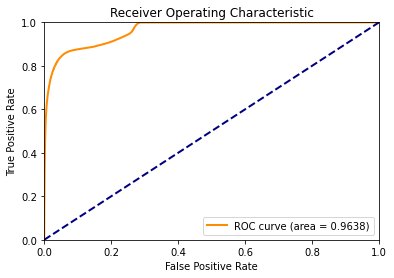

AUC =  0.9637847245268696


In [30]:
fpr, tpr, thresholds = roc_curve(test_y, test_y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()
print('AUC = ',roc_auc)

Text(0.5, 1.0, 'Prediction')

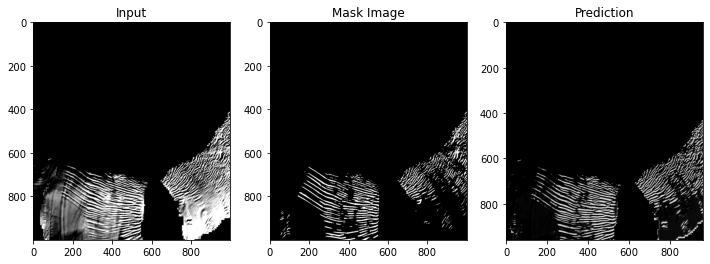

In [39]:
# Plot a graph from testing results

# for i in range(number_of_images):
#  Choose the image with index 2  

i = 2
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].imshow(x_test[i,...,0], aspect="auto")
ax[1].imshow(y_test[i,...,1], aspect="auto")
ax[2].imshow(prediction[i,...,1], aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Mask Image")
ax[2].set_title("Prediction")

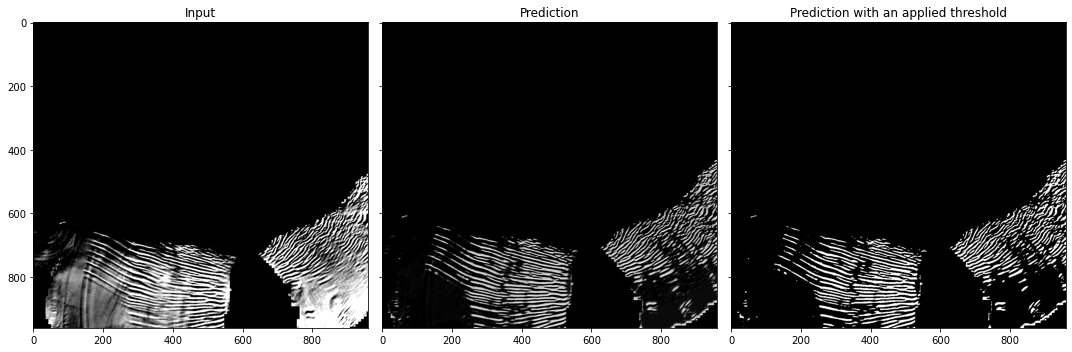

In [40]:
# display image with threshold = 0.2 

i=2#sample index
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax[0].imshow(x_test[i,...,0], aspect="auto")
ax[1].imshow(prediction[i,...,1], aspect="auto")
mask = prediction[i,...,1] > thr
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Prediction")
ax[2].set_title("Prediction with an applied threshold")
fig.tight_layout()

In [22]:
# Determine IOU metric
jaccard_score(test_y,(test_y_predict > thr ))

0.3702542847871619

### Visualize prediction

In [16]:
# Add path 
# and index of data
test_data = image_util.ImageDataProvider("C:/Users/16153/Desktop/Books/ML10/data_ross/*.tif")
i=2 #number of images
x_test, y_test = test_data(i)
print(x_test.shape)
print(y_test.shape)
prediction = net.predict(output_path+"/model.ckpt", x_test)

Number of files used: 2
Number of channels: 1
Number of classes: 2
(2, 1000, 1000, 1)
(2, 1000, 1000, 2)
INFO:tensorflow:Restoring parameters from C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt


2021-12-03 09:43:21,570 Restoring parameters from C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt
2021-12-03 09:43:21,647 Model restored from file: C:/Users/16153/Desktop/Books/ML10/trained_ML_Class/model.ckpt


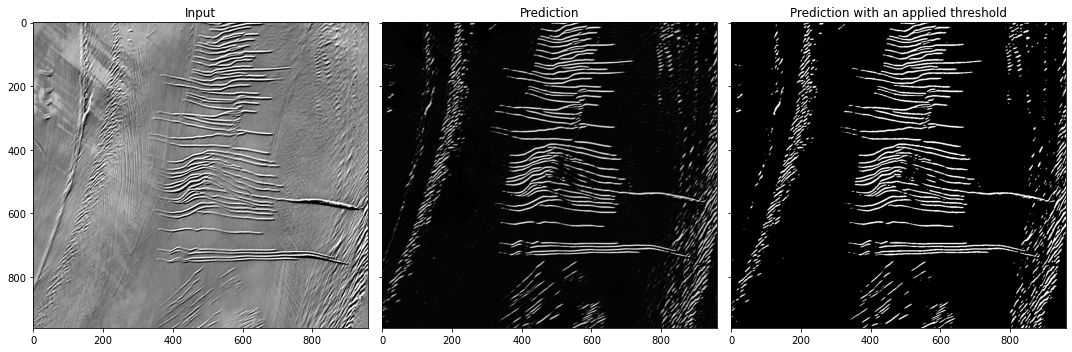

In [19]:
# display image with threshold = 0.2 

i=1#sample index
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax[0].imshow(x_test[i,...,0], aspect="auto")
ax[1].imshow(prediction[i,...,1], aspect="auto")
mask = prediction[i,...,1] > thr
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Prediction")
ax[2].set_title("Prediction with an applied threshold")
fig.tight_layout()

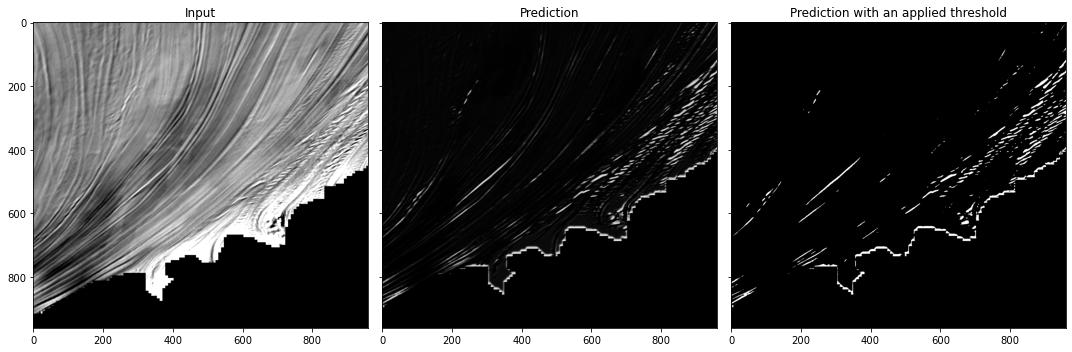

In [20]:
# display image with threshold = 0.2 
i=0#sample index
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax[0].imshow(x_test[i,...,0], aspect="auto")
ax[1].imshow(prediction[i,...,1], aspect="auto")
mask = prediction[i,...,1] > thr
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Prediction")
ax[2].set_title("Prediction with an applied threshold")
fig.tight_layout()